In [19]:
library("DESeq2")

In [52]:
meta_path = "metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable$technical=factor(sampleTable$technical)
sampleTable$sample_type=factor(sampleTable$sample_type)
sampleTable$sample_type <- relevel(sampleTable$sample_type, ref="whole")
sampleTable

,technical,sample_type,sample_name,path
H1_PelletTriflic_Fl_R1,1,sonic_pellet,H1_PelletTriflic_Fl_R1,data/H1_PelletTriflic_FlFusion_5ppm_10ppmfrag/H1_PelletTriflic_Fl_R1.txt
H1_PelletTriflic_Fl_R2,2,sonic_pellet,H1_PelletTriflic_Fl_R2,data/H1_PelletTriflic_FlFusion_5ppm_10ppmfrag/H1_PelletTriflic_Fl_R2.txt
H1_PelletTriflic_Fl_R3,3,sonic_pellet,H1_PelletTriflic_Fl_R3,data/H1_PelletTriflic_FlFusion_5ppm_10ppmfrag/H1_PelletTriflic_Fl_R3.txt
H1_SonicSupTriflic_V2_R1,1,sonic_sup,H1_SonicSupTriflic_V2_R1,data/H1_SonicSupTriflic_FlFusion_5ppm_10ppmfrag/H1_SonicSupTriflic_V2_R1.txt
H1_SonicSupTriflic_V2_R2,2,sonic_sup,H1_SonicSupTriflic_V2_R2,data/H1_SonicSupTriflic_FlFusion_5ppm_10ppmfrag/H1_SonicSupTriflic_V2_R2.txt
H1_SonicSupTriflic_V2_R3,3,sonic_sup,H1_SonicSupTriflic_V2_R3,data/H1_SonicSupTriflic_FlFusion_5ppm_10ppmfrag/H1_SonicSupTriflic_V2_R3.txt
H1_wholetriflic_R1,1,whole,H1_wholetriflic_R1,data/H1_WholeTriflic_FlFusion_5ppm_10ppmfrag/H1_wholetriflic_R1.txt
H1_wholetriflic_R2,2,whole,H1_wholetriflic_R2,data/H1_WholeTriflic_FlFusion_5ppm_10ppmfrag/H1_wholetriflic_R2.txt
H1_wholetriflic_R3,3,whole,H1_wholetriflic_R3,data/H1_WholeTriflic_FlFusion_5ppm_10ppmfrag/H1_wholetriflic_R3.txt


In [53]:
countData = read.csv("out/df_filt.csv", row.names = 1)
colnames(countData) = lapply(colnames(countData), function(x) {gsub("\\.", "_", x)})
sampleTable = sampleTable[colnames(countData),]

In [57]:
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ sample_type)
dds = DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
fitting model and testing


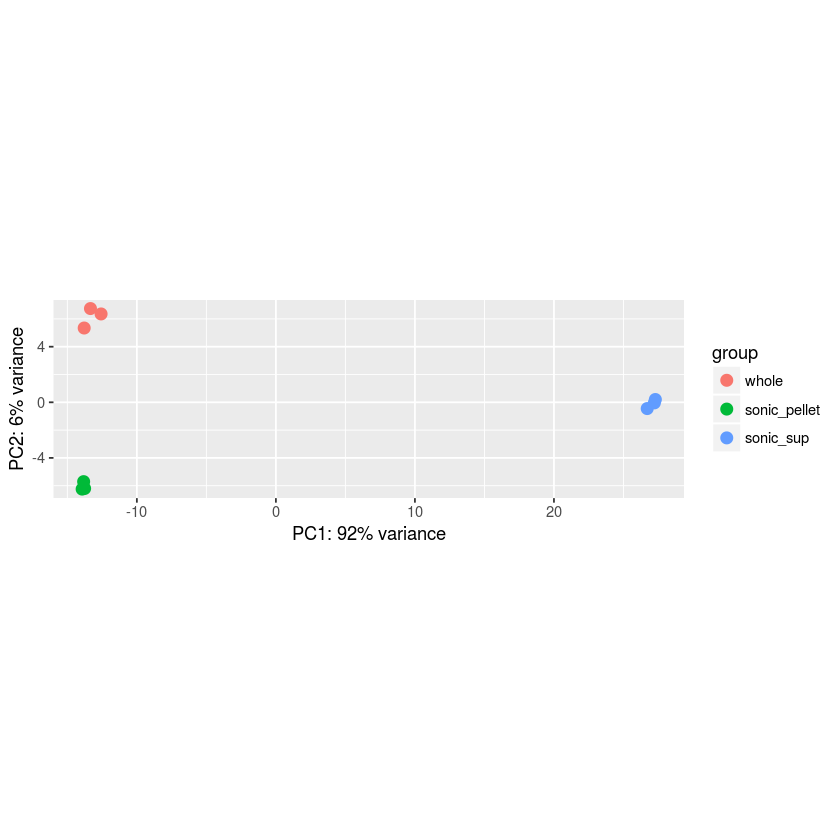

In [60]:
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(vsd, intgroup=c("sample_type"))

In [61]:
# write out normalize, transformed count matrix
write.csv(getVarianceStabilizedData(dds), "out/df_norm_transformed.csv")

In [64]:
## collapse triplicates
dds = collapseReplicates(dds, dds$sample_type)
sampleTable = colData(dds)

In [65]:
sampleTable

DataFrame with 3 rows and 5 columns
             technical  sample_type              sample_name
              <factor>     <factor>                 <factor>
whole                1        whole       H1_wholetriflic_R1
sonic_pellet         1 sonic_pellet   H1_PelletTriflic_Fl_R1
sonic_sup            1    sonic_sup H1_SonicSupTriflic_V2_R1
                                                                                     path
                                                                                 <factor>
whole                 data/H1_WholeTriflic_FlFusion_5ppm_10ppmfrag/H1_wholetriflic_R1.txt
sonic_pellet     data/H1_PelletTriflic_FlFusion_5ppm_10ppmfrag/H1_PelletTriflic_Fl_R1.txt
sonic_sup    data/H1_SonicSupTriflic_FlFusion_5ppm_10ppmfrag/H1_SonicSupTriflic_V2_R1.txt
             sizeFactor
              <numeric>
whole          0.991460
sonic_pellet   1.032664
sonic_sup      1.165605